In [45]:
import numpy as np 
import pandas as pd 
import pickle
import geopandas as gpd 
import matplotlib.pyplot as plt
%matplotlib inline 
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [ ]:
zones_shp = gpd.read_file("/Users/peyman/Dropbox (MIT)/Projects/RL_ridehailing/env/Data/taxi_zones/taxi_zones.shp")
zones_shp = zones_shp[["LocationID", "geometry"]]
zones_shp

In [212]:
fleet_size = 6000

In [213]:
df = pd.read_csv("../performance_stats/"+ 'mycsvfile'+ '_fleet_{}'.format(fleet_size) +'.csv')

In [214]:
df

,Unnamed: 0,Unnamed: 1,w,u,total_demand,served,un_served_demand,denied,los
0,28.0,128,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,28.0,4,0.0,0.0,4.0,0.0,4.0,0.0,0.000000
2,28.0,261,0.0,0.0,5.0,0.0,5.0,0.0,0.000000
3,28.0,262,0.0,0.0,58.0,0.0,58.0,0.0,0.000000
4,28.0,263,0.0,0.0,60.0,0.0,60.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
1275,47.0,246,1.0,17.0,22.0,28.0,-6.0,0.0,1.272727
1276,47.0,120,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1277,47.0,249,0.0,26.0,25.0,25.0,0.0,0.0,1.000000
1278,47.0,125,6.0,12.0,15.0,9.0,6.0,0.0,0.600000


In [215]:
def return_denied_per_zone(df):
    df = df.rename(columns={'Unnamed: 0':"time", 'Unnamed: 1': "zone"})
    with pd.option_context('display.max_rows', 10000, 'display.max_columns', 10):
        return(df.groupby(["zone"])[[ "u","served" ,"denied", "total_demand"]].sum().sort_values(by="denied").reset_index())
        

In [217]:
df

,zone,u,served_2000,denied2000,total_demand2000,denied_rate2000
0,120,0.0,0.0,0.0,0.0,0.000000
1,128,0.0,0.0,1.0,1.0,0.999001
2,194,0.0,0.0,1.0,1.0,0.999001
3,127,2.0,0.0,3.0,3.0,0.999667
4,243,1.0,2.0,8.0,12.0,0.666611
...,...,...,...,...,...,...
59,239,10.0,1062.0,423.0,1622.0,0.260789
60,170,17.0,1596.0,441.0,2221.0,0.198559
61,237,0.0,1725.0,490.0,2392.0,0.204849
62,186,64.0,2043.0,492.0,2854.0,0.172390


In [218]:
for idx, f in enumerate([1500, 2000, 2500, 3000, 3500, 4000]):
    df = pd.read_csv("../performance_stats/"+ 'mycsvfile'+ '_fleet_{}'.format(f) +'.csv')
    df = return_denied_per_zone(df)
    df["denied_rate"] = df["denied"] / (df["total_demand"]+ 0.001)

    df = df.rename(columns={"served":"served_{}".format(f), 
                          "denied":"denied{}".format(f), 
                          "total_demand":"total_demand{}".format(f), 
                           "denied_rate":"denied_rate{}".format(f), 
                            "u":"idle_suuply{}".format(f),  
                          })
    
    if idx > 0:
        df_temp = pd.merge(df_temp, df, on ="zone", suffixes = ("", ""))
    else:
        df_temp = df
        df_temp = df_temp.rename(columns={"served":"served_{}".format(f), 
                          "denied":"denied{}".format(f), 
                          "total_demand":"total_demand{}".format(f), 
                           "denied_rate":"denied_rate{}".format(f),    
                            "u":"idle_suuply{}".format(f),  
                          })
        
        

In [219]:
with pd.option_context('display.max_rows', 10000, 'display.max_columns', 10):
    print(df_temp)

    zone  idle_suuply1500  served_1500  denied1500  total_demand1500  ...  \
0    120              0.0          0.0         0.0               0.0  ...   
1    194              0.0          0.0         1.0               1.0  ...   
2    128              0.0          0.0         1.0               1.0  ...   
3    127              0.0          0.0         3.0               3.0  ...   
4    243              1.0          1.0        11.0              12.0  ...   
5     12              4.0          9.0        21.0              33.0  ...   
6    232              6.0         26.0        23.0              53.0  ...   
7    116              9.0         36.0        36.0              84.0  ...   
8    152              3.0         15.0        40.0              60.0  ...   
9    209              5.0         25.0        44.0              74.0  ...   
10    45              2.0         22.0        48.0              78.0  ...   
11   244              3.0         21.0        49.0              75.0  ...   

In [225]:
df_temp

,zone,idle_suuply1500,served_1500,denied1500,total_demand1500,denied_rate1500,idle_suuply2000,served_2000,denied2000,total_demand2000,...,idle_suuply3500,served_3500,denied3500,total_demand3500,denied_rate3500,idle_suuply4000,served_4000,denied4000,total_demand4000,denied_rate4000
0,120,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
1,194,0.0,0.0,1.0,1.0,0.999001,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.000000,0.0,0.0,1.0,1.0,0.999001
2,128,0.0,0.0,1.0,1.0,0.999001,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.999001,0.0,0.0,1.0,1.0,0.999001
3,127,0.0,0.0,3.0,3.0,0.999667,2.0,0.0,3.0,3.0,...,2.0,0.0,3.0,3.0,0.999667,1.0,0.0,3.0,3.0,0.999667
4,243,1.0,1.0,11.0,12.0,0.916590,1.0,2.0,8.0,12.0,...,3.0,1.0,10.0,12.0,0.833264,5.0,2.0,9.0,12.0,0.749938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,141,0.0,944.0,737.0,1839.0,0.400761,0.0,1367.0,323.0,1839.0,...,609.0,1724.0,0.0,1839.0,0.000000,825.0,1726.0,0.0,1839.0,0.000000
60,170,0.0,1211.0,832.0,2221.0,0.374606,17.0,1596.0,441.0,2221.0,...,702.0,2095.0,0.0,2221.0,0.000000,980.0,2107.0,0.0,2221.0,0.000000
61,237,0.0,1329.0,867.0,2392.0,0.362458,0.0,1725.0,490.0,2392.0,...,717.0,2260.0,0.0,2392.0,0.000000,1102.0,2276.0,0.0,2392.0,0.000000
62,186,0.0,1552.0,989.0,2854.0,0.346531,64.0,2043.0,492.0,2854.0,...,1049.0,2612.0,0.0,2854.0,0.000000,1231.0,2601.0,0.0,2854.0,0.000000


In [221]:
df_temp.to_csv("served_denied_demand_data.csv")

In [222]:
df_w_shp = pd.merge(df_temp, zones_shp, how="left", left_on = "zone", right_on = "LocationID")
df_w_shp = gpd.GeoDataFrame(df_w_shp)
df_w_shp

,zone,idle_suuply1500,served_1500,denied1500,total_demand1500,denied_rate1500,idle_suuply2000,served_2000,denied2000,total_demand2000,...,denied3500,total_demand3500,denied_rate3500,idle_suuply4000,served_4000,denied4000,total_demand4000,denied_rate4000,LocationID,geometry
0,120,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,120,"POLYGON ((1005562.335 252189.432, 1005597.841 ..."
1,194,0.0,0.0,1.0,1.0,0.999001,0.0,0.0,1.0,1.0,...,0.0,1.0,0.000000,0.0,0.0,1.0,1.0,0.999001,194,"POLYGON ((1007397.115 229906.118, 1007658.653 ..."
2,128,0.0,0.0,1.0,1.0,0.999001,0.0,0.0,1.0,1.0,...,1.0,1.0,0.999001,0.0,0.0,1.0,1.0,0.999001,128,"MULTIPOLYGON (((1005378.119 259493.528, 100537..."
3,127,0.0,0.0,3.0,3.0,0.999667,2.0,0.0,3.0,3.0,...,3.0,3.0,0.999667,1.0,0.0,3.0,3.0,0.999667,127,"MULTIPOLYGON (((1008801.909 257357.719, 100881..."
4,243,1.0,1.0,11.0,12.0,0.916590,1.0,2.0,8.0,12.0,...,10.0,12.0,0.833264,5.0,2.0,9.0,12.0,0.749938,243,"POLYGON ((1003177.340 256097.318, 1003219.279 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,141,0.0,944.0,737.0,1839.0,0.400761,0.0,1367.0,323.0,1839.0,...,0.0,1839.0,0.000000,825.0,1726.0,0.0,1839.0,0.000000,141,"POLYGON ((994839.073 216123.698, 994786.740 21..."
60,170,0.0,1211.0,832.0,2221.0,0.374606,17.0,1596.0,441.0,2221.0,...,0.0,2221.0,0.000000,980.0,2107.0,0.0,2221.0,0.000000,170,"POLYGON ((991999.299 210994.739, 991972.635 21..."
61,237,0.0,1329.0,867.0,2392.0,0.362458,0.0,1725.0,490.0,2392.0,...,0.0,2392.0,0.000000,1102.0,2276.0,0.0,2392.0,0.000000,237,"POLYGON ((993633.442 216961.016, 993507.232 21..."
62,186,0.0,1552.0,989.0,2854.0,0.346531,64.0,2043.0,492.0,2854.0,...,0.0,2854.0,0.000000,1231.0,2601.0,0.0,2854.0,0.000000,186,"POLYGON ((986752.603 210853.699, 986627.863 21..."


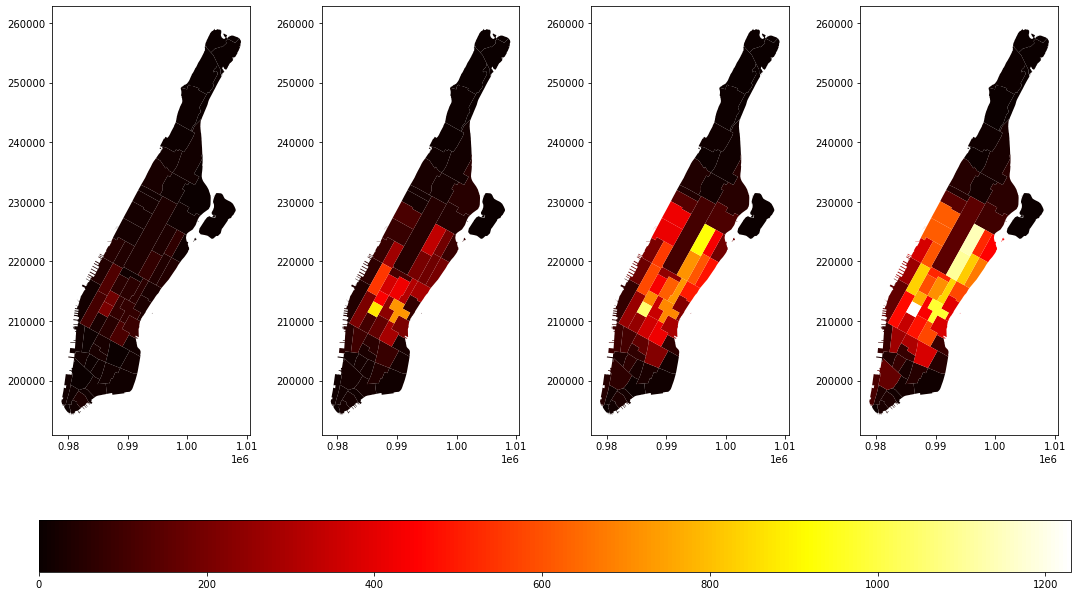

In [224]:
map_multiple(df_w_shp,[ "idle_suuply2500", "idle_suuply3000", "idle_suuply3500", "idle_suuply4000"] )

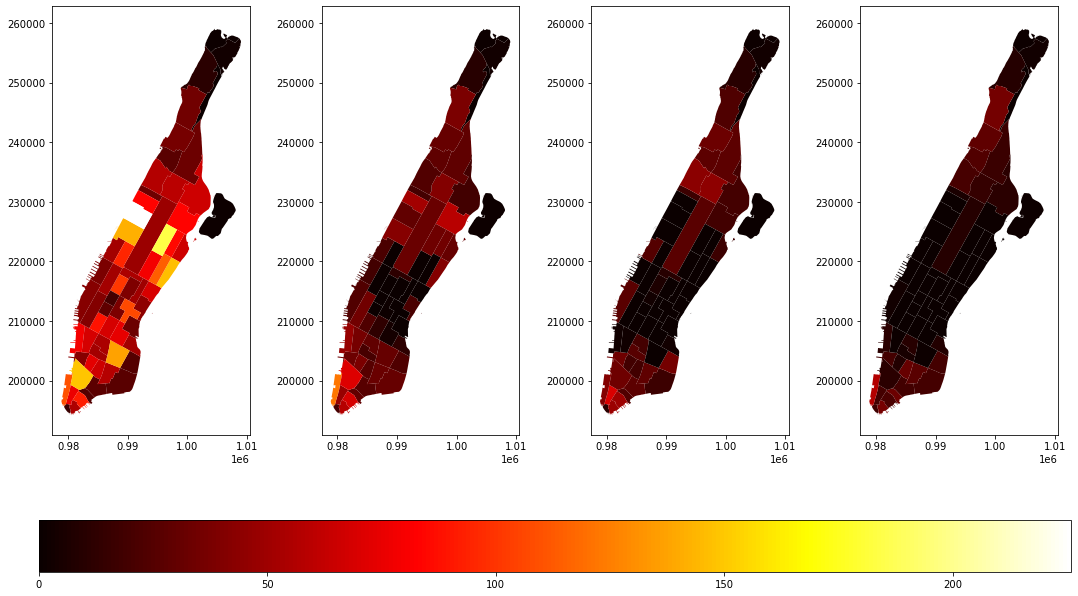

In [223]:
map_multiple(df_w_shp,[ "denied2500", "denied3000", "denied3500", "denied4000"] )

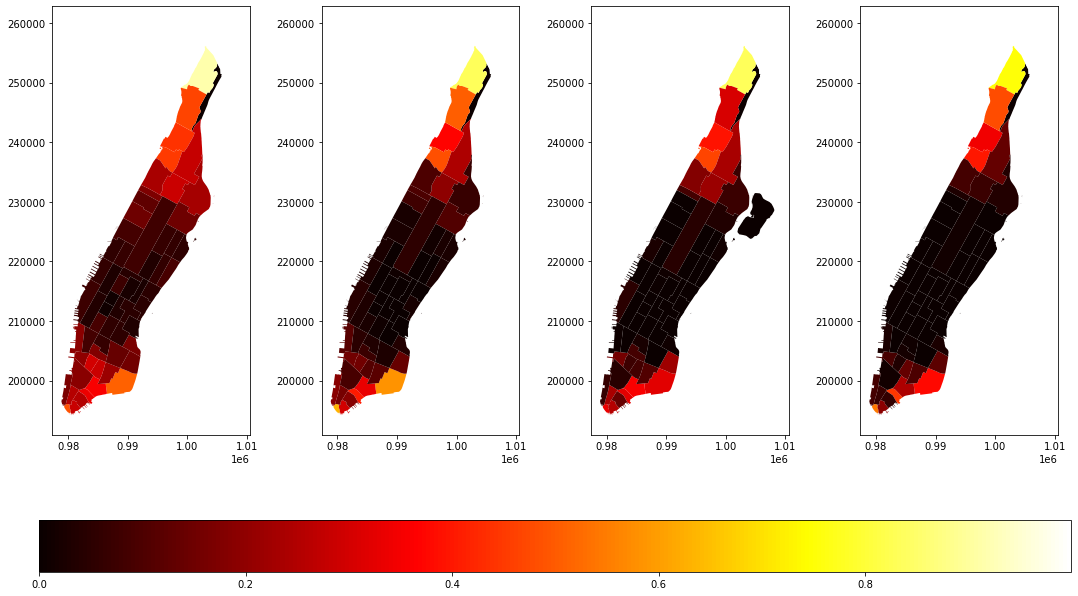

In [206]:
map_multiple(df_w_shp,[ "denied_rate2500", "denied_rate3000", "denied_rate3500", "denied_rate4000"] )

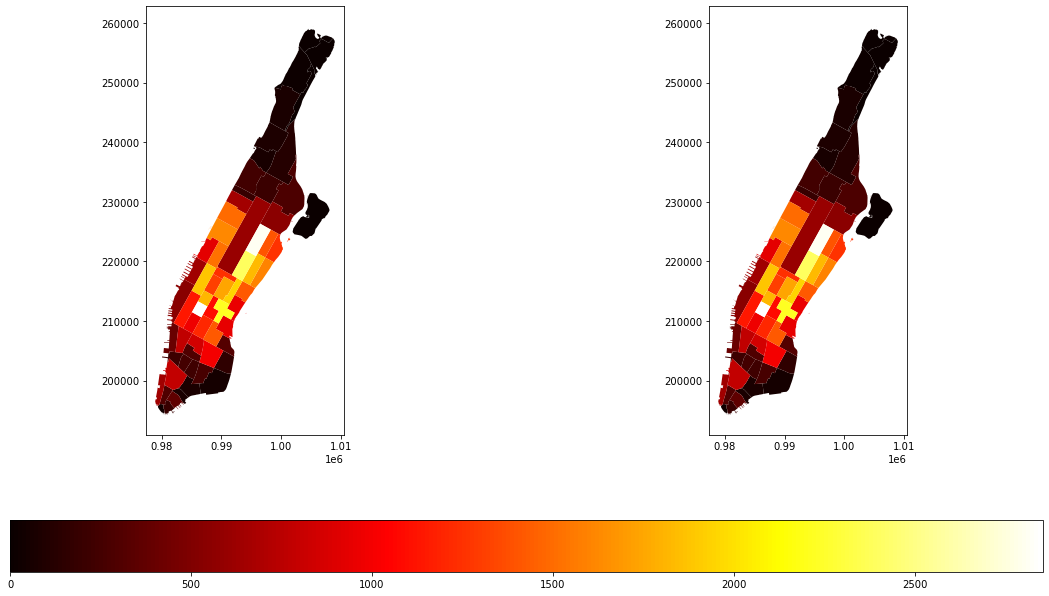

In [208]:
map_multiple(df_w_shp,[ "total_demand2500",  "total_demand3500"] )

In [76]:
with pd.option_context('display.max_rows', 1000):    
    print(df_temp["denied_3000"]- df_temp["denied"])

0       0.0
1       0.0
2       0.0
3       0.0
4      -2.0
5      -5.0
6       5.0
7      -8.0
8       0.0
9      -2.0
10     -6.0
11     -3.0
12      0.0
13     29.0
14    -10.0
15     -7.0
16    -15.0
17      8.0
18      9.0
19     -8.0
20      6.0
21     16.0
22    -34.0
23    -22.0
24     -2.0
25     13.0
26      2.0
27    -24.0
28     -2.0
29    -24.0
30     -1.0
31    -36.0
32     25.0
33     -5.0
34    -51.0
35    -19.0
36     39.0
37    -30.0
38     11.0
39    -47.0
40    -14.0
41     63.0
42     -4.0
43    -75.0
44    -64.0
45    -47.0
46     98.0
47    -22.0
48     35.0
49    -17.0
50     25.0
51     69.0
52     10.0
53    -21.0
54     76.0
55     27.0
56     58.0
57    -17.0
58     17.0
59    -29.0
60     -6.0
61    -70.0
62    104.0
63     29.0
dtype: float64


In [108]:
fleet_size = 6000

In [109]:
df = pd.read_csv("../performance_stats/"+ 'mycsvfile'+ '_fleet_{}'.format(fleet_size) +'.csv')

In [110]:
df = df.rename(columns={'Unnamed: 0':"time", 'Unnamed: 1': "zone"})
df 

,time,zone,w,u,total_demand,served,un_served_demand,denied,los
0,28.0,128,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,28.0,4,0.0,0.0,4.0,0.0,4.0,0.0,0.000000
2,28.0,261,0.0,0.0,5.0,0.0,5.0,0.0,0.000000
3,28.0,262,0.0,0.0,58.0,0.0,58.0,0.0,0.000000
4,28.0,263,0.0,0.0,60.0,0.0,60.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
1275,47.0,246,13.0,0.0,22.0,14.0,8.0,7.0,0.636364
1276,47.0,120,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1277,47.0,249,8.0,0.0,25.0,13.0,12.0,16.0,0.520000
1278,47.0,125,7.0,0.0,15.0,5.0,10.0,10.0,0.333333


In [111]:
with pd.option_context('display.max_rows', 10000, 'display.max_columns', 10):
    print(df.groupby("zone")[["u","denied"]].sum().sort_values(by="u"))

        u  denied
zone             
263   0.0   512.0
140   0.0   636.0
141   0.0   746.0
142   0.0   596.0
143   0.0   364.0
262   0.0   458.0
151   0.0   298.0
239   0.0   671.0
158   0.0   191.0
161   0.0   578.0
162   0.0   633.0
163   0.0   448.0
164   0.0   411.0
238   0.0   667.0
170   0.0   844.0
186   0.0   904.0
194   0.0     1.0
229   0.0   498.0
230   0.0   510.0
231   0.0   357.0
237   0.0   879.0
233   0.0   377.0
234   0.0   394.0
128   0.0     1.0
137   0.0   322.0
68    0.0   382.0
13    0.0   314.0
43    0.0   268.0
48    0.0   661.0
127   0.0     3.0
79    0.0   390.0
249   0.0   320.0
236   0.0  1095.0
243   0.0    10.0
100   0.0   584.0
120   0.0     0.0
107   0.0   535.0
113   0.0   295.0
261   1.0   143.0
211   1.0   113.0
90    1.0   355.0
75    1.0   217.0
50    1.0   259.0
114   2.0   141.0
209   2.0    43.0
224   2.0   127.0
41    2.0    95.0
24    2.0    96.0
87    2.0   172.0
12    2.0    23.0
45    3.0    43.0
148   3.0   119.0
74    3.0   113.0
125   4.0 

In [33]:
with pd.option_context('display.max_rows', 10000, 'display.max_columns', 10):
    print(df.groupby(["zone"])[[ "served" ,"denied"]].sum().sort_values(by="denied"))

      served  denied
zone                
120      0.0     0.0
194      0.0     1.0
128      0.0     1.0
127      0.0     3.0
243      3.0     8.0
12      11.0    18.0
209     48.0    23.0
45      47.0    23.0
244     46.0    24.0
232     20.0    25.0
43     540.0    26.0
142   1390.0    27.0
4      128.0    28.0
224    261.0    30.0
74     218.0    30.0
230   1223.0    31.0
233    853.0    31.0
152     21.0    34.0
42      72.0    34.0
116     40.0    35.0
24     145.0    35.0
100   1622.0    41.0
148    201.0    44.0
166    181.0    45.0
125    153.0    46.0
88     131.0    48.0
158    335.0    49.0
144    169.0    50.0
41     146.0    50.0
114    227.0    52.0
13     546.0    56.0
48    1680.0    56.0
50     533.0    57.0
211    171.0    60.0
234   1076.0    62.0
164    965.0    64.0
246    445.0    67.0
68     976.0    77.0
229   1235.0    77.0
163   1103.0    78.0
143    795.0    80.0
137    782.0    82.0
161   1531.0    83.0
262   1065.0    84.0
140   1406.0    87.0
75     426.0 

In [28]:
with pd.option_context('display.max_rows', 10000, 'display.max_columns', 10):
    print(df.groupby(["zone", "time"])[["los", "denied"]].mean().sort_values(by="los"))

                los  denied
zone time                  
4    28.0  0.000000     0.0
152  41.0  0.000000     0.0
     42.0  0.000000     3.0
     45.0  0.000000     0.0
     46.0  0.000000     0.0
     47.0  0.000000     3.0
158  28.0  0.000000     0.0
152  40.0  0.000000     1.0
75   28.0  0.000000     0.0
162  28.0  0.000000     0.0
163  28.0  0.000000     0.0
164  28.0  0.000000     0.0
166  28.0  0.000000     0.0
74   28.0  0.000000     0.0
170  28.0  0.000000     0.0
161  28.0  0.000000     0.0
186  28.0  0.000000     0.0
152  39.0  0.000000     0.0
79   28.0  0.000000     0.0
128  47.0  0.000000     0.0
137  28.0  0.000000     0.0
140  28.0  0.000000     0.0
141  28.0  0.000000     0.0
142  28.0  0.000000     0.0
88   28.0  0.000000     0.0
152  38.0  0.000000     0.0
143  28.0  0.000000     0.0
148  28.0  0.000000     0.0
87   28.0  0.000000     0.0
151  28.0  0.000000     0.0
152  28.0  0.000000     0.0
     29.0  0.000000     1.0
     33.0  0.000000     3.0
144  28.0  0.000000 

In [98]:
df

,Unnamed: 0,Unnamed: 1,w,u,total_demand,served,un_served_demand,denied,los
0,28.0,128,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,28.0,4,0.0,0.0,4.0,0.0,4.0,0.0,0.000000
2,28.0,261,0.0,0.0,5.0,0.0,5.0,0.0,0.000000
3,28.0,262,0.0,0.0,58.0,0.0,58.0,0.0,0.000000
4,28.0,263,0.0,0.0,60.0,0.0,60.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
1275,47.0,246,12.0,0.0,22.0,14.0,8.0,3.0,0.636364
1276,47.0,120,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1277,47.0,249,6.0,0.0,25.0,21.0,4.0,11.0,0.840000
1278,47.0,125,5.0,0.0,15.0,11.0,4.0,4.0,0.733333


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.770 256767.698, 1026495.593 ..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.310 144283.336, 936046.565 14..."
...,...,...,...,...,...,...,...
258,259,0.126750,0.000395,Woodlawn/Wakefield,259,Bronx,"POLYGON ((1025414.782 270986.139, 1025138.624 ..."
259,260,0.133514,0.000422,Woodside,260,Queens,"POLYGON ((1011466.966 216463.005, 1011545.889 ..."
260,261,0.027120,0.000034,World Trade Center,261,Manhattan,"POLYGON ((980555.204 196138.486, 980570.792 19..."
261,262,0.049064,0.000122,Yorkville East,262,Manhattan,"MULTIPOLYGON (((999804.795 224498.527, 999824...."


,LocationID,geometry
0,1,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,"POLYGON ((1026308.770 256767.698, 1026495.593 ..."
3,4,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,"POLYGON ((935843.310 144283.336, 936046.565 14..."
...,...,...
258,259,"POLYGON ((1025414.782 270986.139, 1025138.624 ..."
259,260,"POLYGON ((1011466.966 216463.005, 1011545.889 ..."
260,261,"POLYGON ((980555.204 196138.486, 980570.792 19..."
261,262,"MULTIPOLYGON (((999804.795 224498.527, 999824...."


In [22]:
type(zones_shp)

geopandas.geodataframe.GeoDataFrame

In [16]:
df_w_shp = pd.merge(df_temp, zones_shp, how="left", left_on = "zone", right_on = "LocationID")
df_w_shp

,zone,served_1500,denied1500,total_demand1500,served_2000,denied2000,total_demand2000,served_2500,denied2500,total_demand2500,...,denied3000,total_demand3000,served_3500,denied3500,total_demand3500,served_6000,denied6000,total_demand6000,LocationID,geometry
0,120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120,"POLYGON ((1005562.335 252189.432, 1005597.841 ..."
1,194,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,2.0,1.0,3.0,1.0,0.0,1.0,194,"POLYGON ((1007397.115 229906.118, 1007658.653 ..."
2,128,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,128,"MULTIPOLYGON (((1005378.119 259493.528, 100537..."
3,127,0.0,3.0,3.0,0.0,3.0,3.0,0.0,3.0,3.0,...,3.0,3.0,0.0,6.0,6.0,1.0,2.0,3.0,127,"MULTIPOLYGON (((1008801.909 257357.719, 100881..."
4,243,1.0,11.0,12.0,2.0,8.0,12.0,1.0,11.0,12.0,...,10.0,12.0,5.0,8.0,14.0,3.0,9.0,12.0,243,"POLYGON ((1003177.340 256097.318, 1003219.279 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,141,944.0,737.0,1839.0,1367.0,323.0,1839.0,1585.0,114.0,1839.0,...,0.0,1839.0,3698.0,3.0,3852.0,1720.0,0.0,1839.0,141,"POLYGON ((994839.073 216123.698, 994786.740 21..."
60,170,1211.0,832.0,2221.0,1596.0,441.0,2221.0,1950.0,107.0,2221.0,...,0.0,2221.0,4563.0,0.0,4727.0,2117.0,0.0,2221.0,170,"POLYGON ((991999.299 210994.739, 991972.635 21..."
61,237,1329.0,867.0,2392.0,1725.0,490.0,2392.0,2162.0,79.0,2392.0,...,0.0,2392.0,6226.0,0.0,6430.0,2245.0,0.0,2392.0,237,"POLYGON ((993633.442 216961.016, 993507.232 21..."
62,186,1552.0,989.0,2854.0,2043.0,492.0,2854.0,2539.0,29.0,2854.0,...,0.0,2854.0,5088.0,0.0,5408.0,2606.0,0.0,2854.0,186,"POLYGON ((986752.603 210853.699, 986627.863 21..."


In [23]:
type(df_w_shp)

pandas.core.frame.DataFrame

In [26]:
df_w_shp = gpd.GeoDataFrame(df_w_shp)
df_w_shp

,zone,served_1500,denied1500,total_demand1500,served_2000,denied2000,total_demand2000,served_2500,denied2500,total_demand2500,...,denied3000,total_demand3000,served_3500,denied3500,total_demand3500,served_6000,denied6000,total_demand6000,LocationID,geometry
0,120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120,"POLYGON ((1005562.335 252189.432, 1005597.841 ..."
1,194,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,2.0,1.0,3.0,1.0,0.0,1.0,194,"POLYGON ((1007397.115 229906.118, 1007658.653 ..."
2,128,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,128,"MULTIPOLYGON (((1005378.119 259493.528, 100537..."
3,127,0.0,3.0,3.0,0.0,3.0,3.0,0.0,3.0,3.0,...,3.0,3.0,0.0,6.0,6.0,1.0,2.0,3.0,127,"MULTIPOLYGON (((1008801.909 257357.719, 100881..."
4,243,1.0,11.0,12.0,2.0,8.0,12.0,1.0,11.0,12.0,...,10.0,12.0,5.0,8.0,14.0,3.0,9.0,12.0,243,"POLYGON ((1003177.340 256097.318, 1003219.279 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,141,944.0,737.0,1839.0,1367.0,323.0,1839.0,1585.0,114.0,1839.0,...,0.0,1839.0,3698.0,3.0,3852.0,1720.0,0.0,1839.0,141,"POLYGON ((994839.073 216123.698, 994786.740 21..."
60,170,1211.0,832.0,2221.0,1596.0,441.0,2221.0,1950.0,107.0,2221.0,...,0.0,2221.0,4563.0,0.0,4727.0,2117.0,0.0,2221.0,170,"POLYGON ((991999.299 210994.739, 991972.635 21..."
61,237,1329.0,867.0,2392.0,1725.0,490.0,2392.0,2162.0,79.0,2392.0,...,0.0,2392.0,6226.0,0.0,6430.0,2245.0,0.0,2392.0,237,"POLYGON ((993633.442 216961.016, 993507.232 21..."
62,186,1552.0,989.0,2854.0,2043.0,492.0,2854.0,2539.0,29.0,2854.0,...,0.0,2854.0,5088.0,0.0,5408.0,2606.0,0.0,2854.0,186,"POLYGON ((986752.603 210853.699, 986627.863 21..."


https://gis.stackexchange.com/questions/273273/reducing-space-in-geopandas-and-matplotlib-pyplots-subplots
https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.colors.Normalize.html#matplotlib.colors.Normalize

In [151]:
def map_multiple(df, columns):
    ncol = len(columns)
    fig, axs = plt.subplots(1, ncol)
    fig.set_size_inches(18.5, 10.5)
    
    vmax = np.max((df_w_shp[columns]).max())
    # df_w_shp.plot(column="denied2000", ax = ax1, legend=False, cmap='hot', vmin=0, vmax=vmax)
    for i, col in enumerate(columns):
        df.plot(column=col, ax = axs[i], legend=False, cmap='hot', vmin=0, vmax=vmax)
    
    sm = plt.cm.ScalarMappable(cmap="hot", norm=plt.Normalize(vmin=0, vmax=vmax))

    cbar = fig.colorbar(sm, ax=axs, orientation='horizontal', fraction=.1)
#     return axs

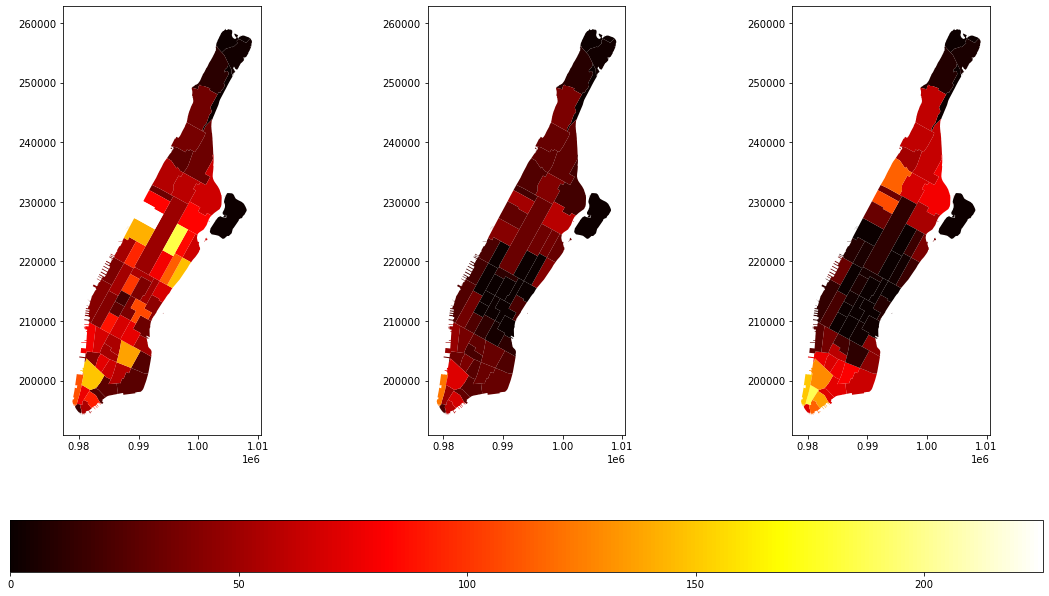

In [153]:
map_multiple(df_w_shp,[ "denied2500", "denied3000", "denied3500"] )

In [137]:
a.shape

(3,)

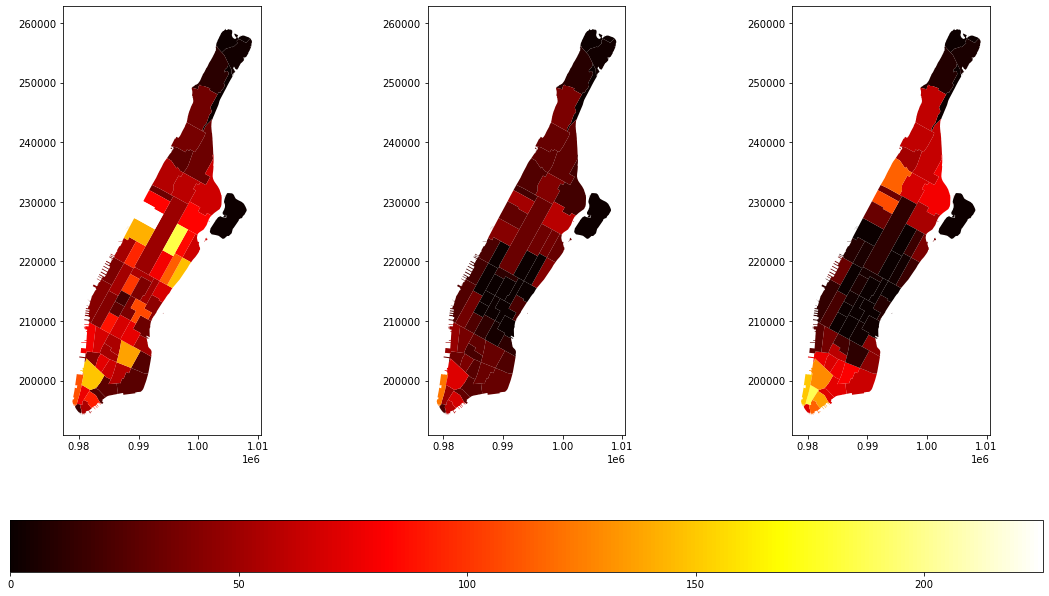

In [106]:
fig, [ax1, ax2, ax3] = plt.subplots(1, 3)
fig.set_size_inches(18.5, 10.5)
# divider = make_axes_locatable(ax1)
# cax = divider.append_axes("left", size="5%", pad=1)
vmax = np.max((df_w_shp[[ "denied2500", "denied3000", "denied3500"]]).max())
# df_w_shp.plot(column="denied2000", ax = ax1, legend=False, cmap='hot', vmin=0, vmax=vmax)
df_w_shp.plot(column="denied2500", ax = ax1, legend=False, cmap='hot', vmin=0, vmax=vmax)
df_w_shp.plot(column="denied3000", ax = ax2, legend=False, cmap='hot', vmin=0, vmax=vmax)
df_w_shp.plot(column="denied3500", ax = ax3, legend=False, cmap='hot', vmin=0, vmax=vmax)
# fig.colorbar(ax1, ax=[ax1, ax2, ax3, ax4], orientation='horizontal', fraction=.1)
sm = plt.cm.ScalarMappable(cmap="hot", norm=plt.Normalize(vmin=0, vmax=vmax))
# sm._A = []
cbar = fig.colorbar(sm,ax=[ax1, ax2, ax3],orientation='horizontal', fraction=.1)
# cbar.ax.set_title('Number of Cases')

In [102]:
vmax

633.0

In [80]:
sm = plt.cm.ScalarMappable(cmap="hot", norm=plt.Normalize(vmin=0, vmax=600))
sm._A = []
cbar = fig.colorbar(sm, cax=cax)
cbar.ax.set_title('Number of Cases')


Text(0.5, 1.0, 'Number of Cases')

In [ ]:
gpd.

In [2]:
with open('../performance_stats/stats.pickle', 'rb') as handle:
    data = pickle.load(handle)

In [3]:
data.keys()

dict_keys([84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0])

In [4]:
len(data.keys())

60

In [5]:
for k, v in data.items():
    print(v)
    break 

{128: (0, 0, 0.0, 0.0, 0), 4: (0, 0, 0.0, 4.0, 0.0), 261: (0, 0, 0.0, 5.0, 0.0), 262: (0, 0, 0.0, 58.0, 0.0), 263: (0, 0, 0.0, 60.0, 0.0), 137: (0, 0, 0.0, 48.0, 0.0), 12: (0, 0, 0.0, 0.0, 0), 13: (0, 0, 0.0, 28.0, 0.0), 140: (0, 0, 0.0, 48.0, 0.0), 141: (0, 0, 0.0, 77.0, 0.0), 142: (0, 0, 0.0, 55.0, 0.0), 143: (0, 0, 0.0, 29.0, 0.0), 144: (0, 0, 0.0, 3.0, 0.0), 148: (0, 0, 0.0, 7.0, 0.0), 151: (0, 0, 0.0, 29.0, 0.0), 24: (0, 0, 0.0, 12.0, 0.0), 152: (0, 0, 0.0, 1.0, 0.0), 158: (0, 0, 0.0, 14.0, 0.0), 161: (0, 0, 0.0, 62.0, 0.0), 162: (0, 0, 0.0, 55.0, 0.0), 163: (0, 0, 0.0, 30.0, 0.0), 164: (0, 0, 0.0, 30.0, 0.0), 166: (0, 0, 0.0, 8.0, 0.0), 41: (0, 0, 0.0, 10.0, 0.0), 42: (0, 0, 0.0, 9.0, 0.0), 43: (0, 0, 0.0, 15.0, 0.0), 170: (0, 0, 0.0, 80.0, 0.0), 45: (0, 0, 0.0, 0.0, 0), 48: (0, 0, 0.0, 101.0, 0.0), 50: (0, 0, 0.0, 28.0, 0.0), 186: (0, 0, 0.0, 184.0, 0.0), 194: (0, 0, 0.0, 0.0, 0), 68: (0, 0, 0.0, 45.0, 0.0), 74: (0, 0, 0.0, 20.0, 0.0), 75: (0, 0, 0.0, 19.0, 0.0), 79: (0, 0, 0.0,

In [6]:
dict_you_want = { k: data[k] for k in data.keys() if k >= (84+6) }


In [14]:
# https://stackoverflow.com/questions/13575090/construct-pandas-dataframe-from-items-in-nested-dictionary

In [15]:
performance_results = pd.concat({t:pd.DataFrame(stats).T for t, stats in dict_you_want.items()}, axis=0)
performance_results

0    1     2     3         4
90.0  128    0.0  0.0   0.0   0.0  0.000000
      4      5.0  0.0   0.0   3.0  0.000000
      261   10.0  0.0   0.0   8.0  0.000000
      262   88.0  0.0  10.0  70.0  0.125000
      263   76.0  0.0   9.0  65.0  0.121622
...          ...  ...   ...   ...       ...
143.0 246  356.0  0.0   3.0  42.0  0.066667
      120    0.0  0.0   0.0   0.0  0.000000
      249  498.0  0.0   4.0  34.0  0.105263
      125  141.0  0.0   2.0  18.0  0.100000
      127    2.0  0.0   0.0   0.0  0.000000

[3456 rows x 5 columns]

In [16]:
performance_results.to_csv("performance_results.csv")